In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TES Project/Condo2.csv")
df.head()

,Location (Kuala Lumpur),Rooms,Bathrooms,Car Parks,Furnishing,Property Details,Size Type,Size Number (sq. ft.),Price Range
0,33,3,2.0,1.0,1,3,0,805.0,Low
1,38,3,2.0,1.0,2,3,0,850.0,Low
2,38,3,2.0,1.0,2,3,0,850.0,Low
3,33,3,2.0,1.0,2,3,0,802.0,Low
4,33,3,2.0,1.0,2,3,0,850.0,Low


In [4]:
X = df.drop('Price Range', axis=1)  # Features
y = df['Price Range']              # Target

le = LabelEncoder()
X['Location (Kuala Lumpur)'] = le.fit_transform(X['Location (Kuala Lumpur)'])
X['Furnishing'] = le.fit_transform(X['Furnishing'])
X['Property Details'] = le.fit_transform(X['Property Details'])
X['Size Type'] = le.fit_transform(X['Size Type'])

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                   test_size =0.2,
                                  random_state=42)

X_train,X_valid,y_train,y_valid=train_test_split( X_train,y_train,
                                   test_size =0.25,
                                  random_state=42)

In [6]:
print("X_train Shape: ",X_train.shape)
print("y_train Shape: ",y_train.shape)
print()
print("X_test Shape: ",X_test.shape)
print("y_test Shape: ",y_test.shape)
print()
print("X_valid Shape: ",X_valid.shape)
print("y_valid Shape: ",y_valid.shape)

X_train Shape:  (10998, 8)
y_train Shape:  (10998,)

X_test Shape:  (3667, 8)
y_test Shape:  (3667,)

X_valid Shape:  (3667, 8)
y_valid Shape:  (3667,)


In [7]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
# Initialize SVM classifier
clf = SVC(
    kernel='rbf',
    C=1000,
    probability=True,
    random_state=42
)

# Train the SVM model
clf.fit(X_train, y_train)

SVC(C=1000, probability=True, random_state=42)

In [9]:

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

y_pred_valid = clf.predict(X_valid)

In [10]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)

print("Train Accuracy: ", train_accuracy*100)
print("Test Accuracy: ", test_accuracy*100)
print("Valid Accuracy: ", valid_accuracy*100)

Train Accuracy:  75.11365702855065
Test Accuracy:  65.33951458958278
Valid Accuracy:  66.83937823834198


In [11]:
print(classification_report(y_test,y_pred_test,labels= clf.classes_.tolist()))

                precision    recall  f1-score   support

Extremely High       0.75      0.79      0.77       903
          High       0.57      0.58      0.57       913
           Low       0.72      0.72      0.72       909
        Medium       0.57      0.52      0.55       942

      accuracy                           0.65      3667
     macro avg       0.65      0.65      0.65      3667
  weighted avg       0.65      0.65      0.65      3667



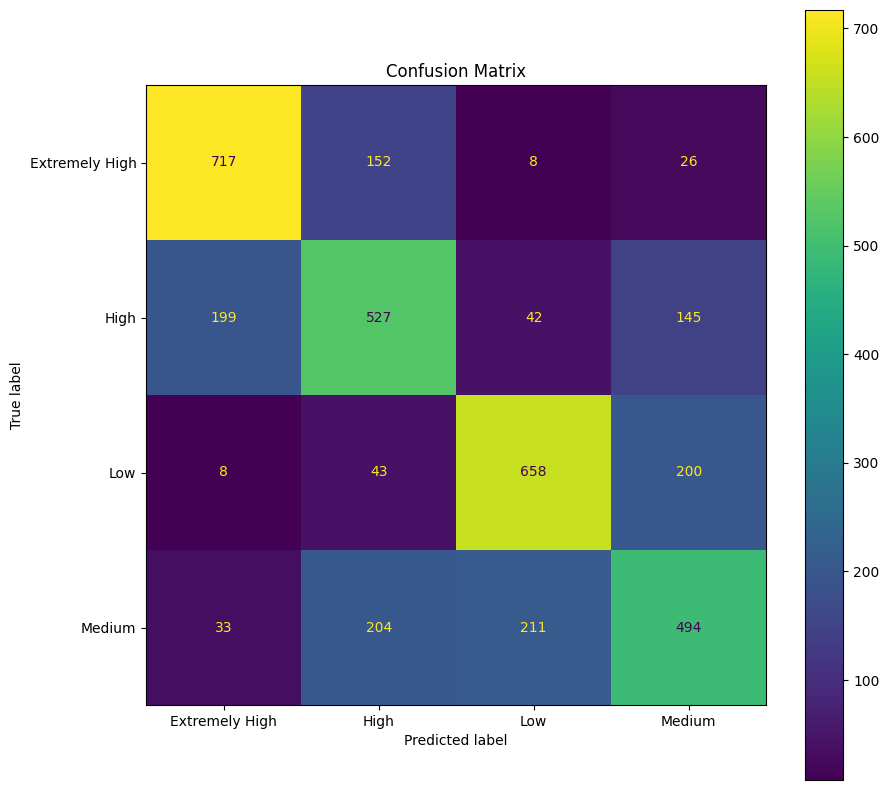

In [12]:
class_names = clf.classes_.tolist()

cm = confusion_matrix(y_test,y_pred_test,labels = clf.classes_.tolist())

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= class_names)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [13]:
y_test_encoded = le.fit_transform(y_test)
y_pred_test_encoded = le.transform(y_pred_test)

y_pred_test_proba = clf.predict_proba(X_test)

print(roc_auc_score(y_test_encoded, y_pred_test_proba, multi_class='ovo'))

0.8660960219034753


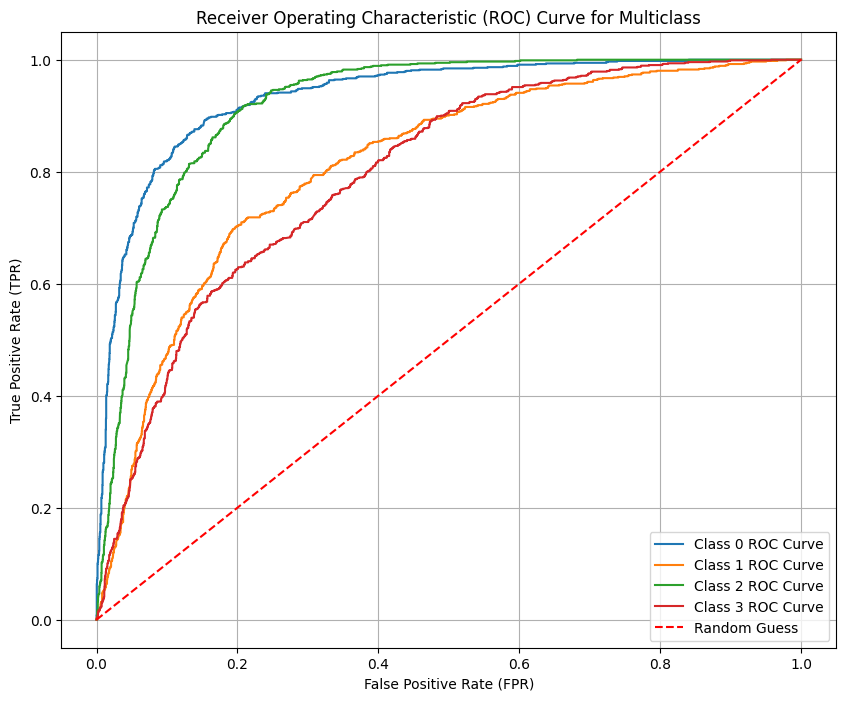

In [14]:
y_test_binarized = label_binarize(y_test_encoded, classes=range(len(set(y_test_encoded))))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_pred_test_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ROC Curve')

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')

# Plot settings
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [15]:
print(classification_report(y_valid,y_pred_valid,labels= clf.classes_.tolist()))

                precision    recall  f1-score   support

Extremely High       0.74      0.77      0.75       886
          High       0.61      0.62      0.61       927
           Low       0.75      0.72      0.73       952
        Medium       0.58      0.57      0.57       902

      accuracy                           0.67      3667
     macro avg       0.67      0.67      0.67      3667
  weighted avg       0.67      0.67      0.67      3667



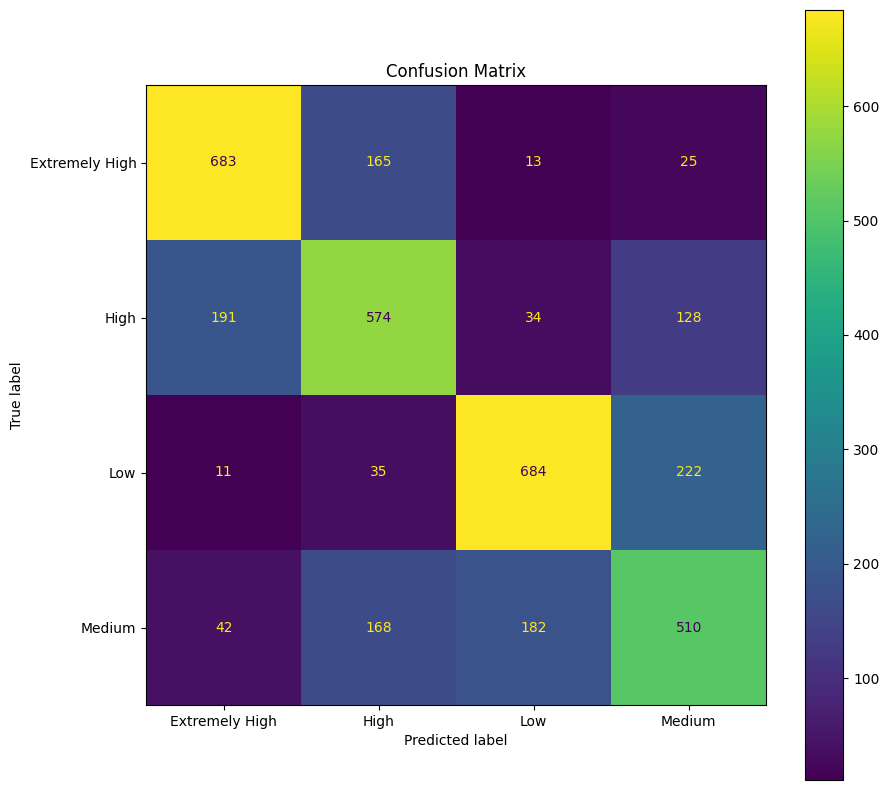

In [16]:
cm = confusion_matrix(y_valid,y_pred_valid,labels = clf.classes_.tolist())

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= class_names)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)

In [17]:
y_valid_encoded = le.fit_transform(y_valid)
y_pred_valid_encoded = le.transform(y_pred_valid)

y_pred_valid_proba = clf.predict_proba(X_valid)

print(roc_auc_score(y_valid_encoded, y_pred_valid_proba, multi_class="ovo"))

0.8766636708621799


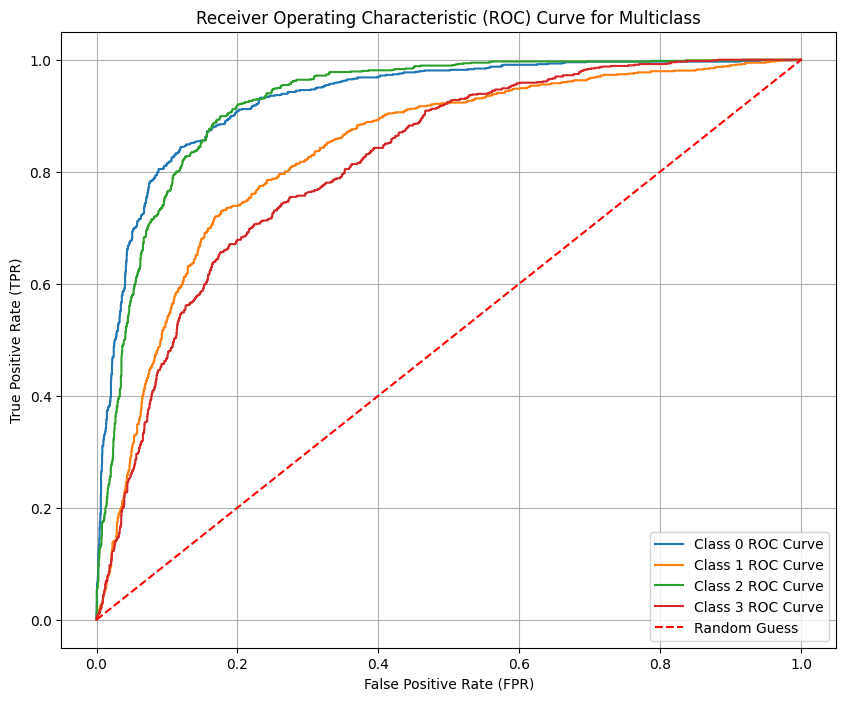

In [18]:
y_valid_binarized = label_binarize(y_valid_encoded, classes=range(len(set(y_valid_encoded))))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_valid_binarized[:, i], y_pred_valid_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ROC Curve')

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')

# Plot settings
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [21]:
save_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Project/SVM_model.joblib'

joblib.dump(clf, save_path)

print(f"Best XGB model saved to: {save_path}")

Best XGB model saved to: /content/drive/MyDrive/Colab Notebooks/Data Mining/Project/SVM_model.joblib
